In [1]:
from astropy.io import fits, ascii
from astropy.table import Table, Column, hstack
from astropy.time import Time
import numpy as np
import rafias_lib as rl
import pdb, glob, matplotlib, string
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] =  (10, 8)

## General

In [2]:
dtype = ['MMM', 'MMP']
dnum = [111, 112]

#### FULL1

In [3]:
a11_files = []
for each in dtype:
    a11_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL1-*_481_SE_*/*.red.fits')))
print len(a11_files), len(a11_files[0]), len(a11_files[1])

2 225 225


In [4]:
b41_files = []
for each in dtype:
    b41_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL1-*_489_SE_*/*.red.fits')))
print len(b41_files), len(b41_files[0]), len(b41_files[1])

2 225 225


In [5]:
a11_centers = []
for i, ds in enumerate(a11_files):
    if i == 0:
        a11_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True)[0])
    else:
        a11_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits')[0])
print len(a11_centers), len(a11_centers[0])

2 225


In [6]:
b41_centers = []
for i, ds in enumerate(b41_files):
    if i == 0:
        b41_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True)[0])
    else:
        b41_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits')[0])
print len(b41_centers), len(b41_centers[0])

2 225


In [7]:
mmm_data1 = rl.average_residual_flux(a11_centers[0], b41_centers[0], 70, 72, 80, 
                                     a11_files[0], b41_files[0], red = True)
mmp_data1 = rl.average_residual_flux(a11_centers[1], b41_centers[1], 70, 72, 80, 
                                     a11_files[1], b41_files[1], red = True, flat_name_a1 = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits', flat_name_b4 = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits')

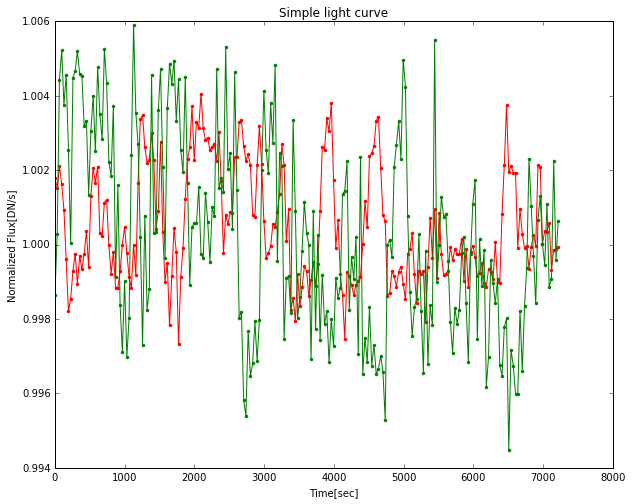

In [8]:
rl.light_curve(mmm_data1['Time'], mmm_data1['a1_b4_res_flux'], style = 'r.-', lbl = "FULL1 MMM")
rl.light_curve(mmp_data1['Time'], mmp_data1['a1_b4_res_flux'], style = 'g.-', lbl = "FULL1 MMP")

In [9]:
detrended_mmm1 = rl.linear_bestfit(mmm_data1['Time'], mmm_data1['a1_b4_res_flux'], 0.002, 0.9)
detrended_mmp1 = rl.linear_bestfit(mmp_data1['Time'], mmp_data1['a1_b4_res_flux'], 0.002, 0.9)
std_m1 = np.std(detrended_mmm1)*1e6
std_p1 = np.std(detrended_mmp1)*1e6

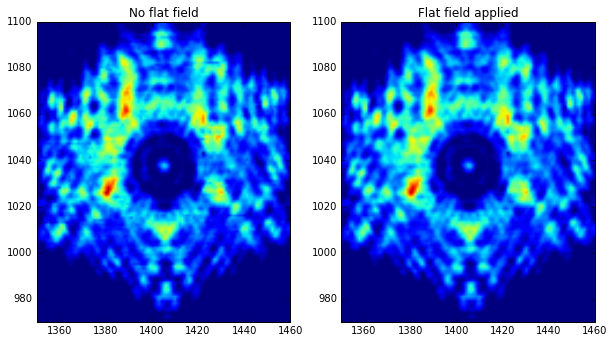

In [10]:
# No flat field
im_noff = rl.test_image(a11_files[0], red = True)
plt.subplot(1,2,1)
plt.title('No flat field')
plt.xlim(1350, 1460)
plt.ylim(970, 1100)
plt.imshow(im_noff, vmin = 100, vmax = 1000)

#flat field applied'
im_ff = rl.test_image(a11_files[1], red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits')
plt.subplot(1,2,2)
plt.title('Flat field applied')
plt.xlim(1350, 1460)
plt.ylim(970, 1100)
plt.imshow(im_ff, vmin = 100, vmax = 1000)

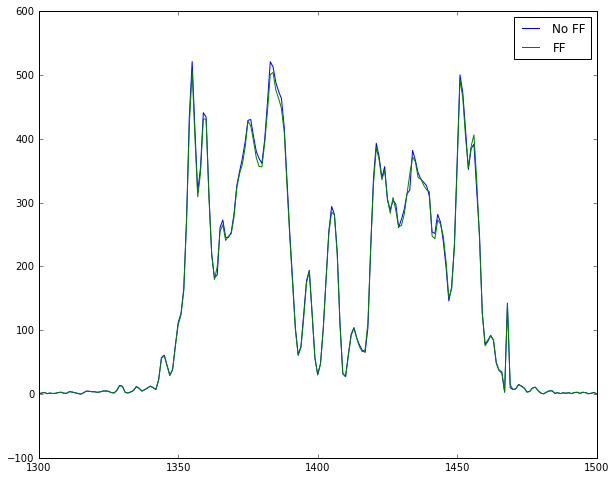

In [11]:
plt.xlim(1300, 1500)
plt.plot(im_noff[1036,:], label = 'No FF')
plt.plot(im_ff[1036,:], label = 'FF')
plt.legend(loc='best')

#### FULL2

In [12]:
a12_files = []
for each in dtype:
    a12_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL2-*_481_SE_*/*.red.fits')))
print len(a12_files), len(a12_files[0]), len(a12_files[1])

2 225 225


In [13]:
b42_files = []
for each in dtype:
    b42_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL2-*_489_SE_*/*.red.fits')))
print len(b42_files), len(b42_files[0]), len(b42_files[1])

2 225 225


In [14]:
a12_centers = []
for i, ds in enumerate(a12_files):
    if i == 0:
        a12_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True)[0])
    else:
        a12_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits')[0])
print len(a12_centers), len(a12_centers[0])

2 225


In [15]:
b42_centers = []
for i, ds in enumerate(b42_files):
    if i == 0:
        b42_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True)[0])
    else:
        b42_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits')[0])
print len(b42_centers), len(b42_centers[0])

2 225


In [16]:
mmm_data2 = rl.average_residual_flux(a12_centers[0], b42_centers[0], 70, 72, 80, 
                                     a12_files[0], b42_files[0], red = True)
mmp_data2 = rl.average_residual_flux(a12_centers[1], b42_centers[1], 70, 72, 80, 
                                     a12_files[1], b42_files[1], red = True, flat_name_a1 = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits', flat_name_b4 = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits')

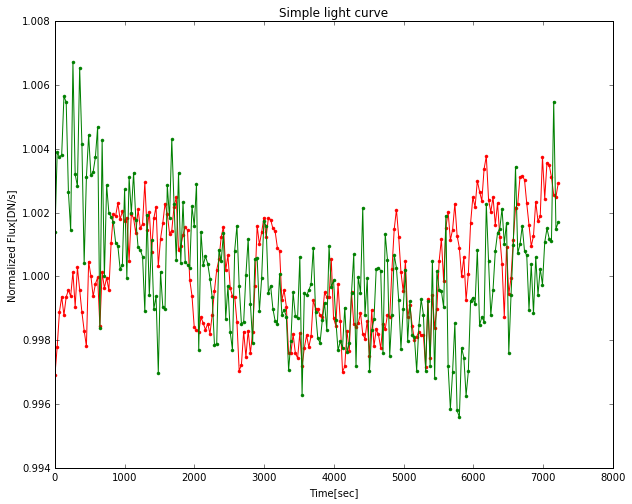

In [17]:
rl.light_curve(mmm_data2['Time'], mmm_data2['a1_b4_res_flux'], style = 'r.-', lbl = "FULL2 MMM")
rl.light_curve(mmp_data2['Time'], mmp_data2['a1_b4_res_flux'], style = 'g.-', lbl = "FULL2 MMP")

In [18]:
detrended_mmm2 = rl.linear_bestfit(mmm_data2['Time'], mmm_data2['a1_b4_res_flux'], 0.002, 0.9)
detrended_mmp2 = rl.linear_bestfit(mmp_data2['Time'], mmp_data2['a1_b4_res_flux'], 0.002, 0.9)
std_m2 = np.std(detrended_mmm2)*1e6
std_p2 = np.std(detrended_mmp2)*1e6

#### FULL3

In [19]:
a13_files = []
for each in dtype:
    a13_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL3-*_481_SE_*/*.red.fits')))
print len(a13_files), len(a13_files[0]), len(a13_files[1])

2 225 225


In [20]:
b43_files = []
for each in dtype:
    b43_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL3-*_489_SE_*/*.red.fits')))
print len(b43_files), len(b43_files[0]), len(b43_files[1])

2 225 225


In [21]:
a13_centers = []
for i, ds in enumerate(a13_files):
    if i == 0:
        a13_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True)[0])
    else:
        a13_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits')[0])
print len(a13_centers), len(a13_centers[0])

2 225


In [22]:
b43_centers = []
for i, ds in enumerate(b43_files):
    if i == 0:
        b43_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True)[0])
    else:
        b43_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits')[0])
print len(b43_centers), len(b43_centers[0])

2 225


In [23]:
mmm_data3 = rl.average_residual_flux(a13_centers[0], b43_centers[0], 70, 72, 80, 
                                     a13_files[0], b43_files[0], red = True)
mmp_data3 = rl.average_residual_flux(a13_centers[1], b43_centers[1], 70, 72, 80, 
                                     a13_files[1], b43_files[1], red = True, flat_name_a1 = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits', flat_name_b4 = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits')

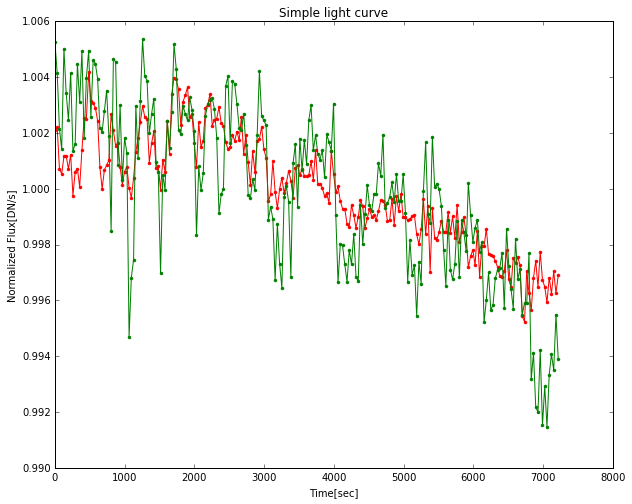

In [24]:
rl.light_curve(mmm_data3['Time'], mmm_data3['a1_b4_res_flux'], style = 'r.-', lbl = "FULL3 MMM")
rl.light_curve(mmp_data3['Time'], mmp_data3['a1_b4_res_flux'], style = 'g.-', lbl = "FULL3 MMP")

In [25]:
detrended_mmm3 = rl.linear_bestfit(mmm_data3['Time'], mmm_data3['a1_b4_res_flux'], 0.002, 0.9)
detrended_mmp3 = rl.linear_bestfit(mmp_data3['Time'], mmp_data3['a1_b4_res_flux'], 0.002, 0.9)
std_m3 = np.std(detrended_mmm3)*1e6
std_p3 = np.std(detrended_mmp3)*1e6

#### FULL4

In [26]:
a14_files = []
for each in dtype:
    a14_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL4-*_481_SE_*/*.red.fits')))
print len(a14_files), len(a14_files[0]), len(a14_files[1])

2 225 225


In [27]:
b44_files = []
for each in dtype:
    b44_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL4-*_489_SE_*/*.red.fits')))
print len(b44_files), len(b44_files[0]), len(b44_files[1])

2 225 225


In [28]:
a14_centers = []
for i, ds in enumerate(a14_files):
    if i == 0:
        a14_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True)[0])
    else:
        a14_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits')[0])
print len(a14_centers), len(a14_centers[0])

2 225


In [29]:
b44_centers = []
for i, ds in enumerate(b44_files):
    if i == 0:
        b44_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True)[0])
    else:
        b44_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits')[0])
print len(b44_centers), len(b44_centers[0])

2 225


In [30]:
mmm_data4 = rl.average_residual_flux(a14_centers[0], b44_centers[0], 70, 72, 80, 
                                     a14_files[0], b44_files[0], red = True)
mmp_data4 = rl.average_residual_flux(a14_centers[1], b44_centers[1], 70, 72, 80, 
                                     a14_files[1], b44_files[1], red = True, flat_name_a1 = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits', flat_name_b4 = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits')

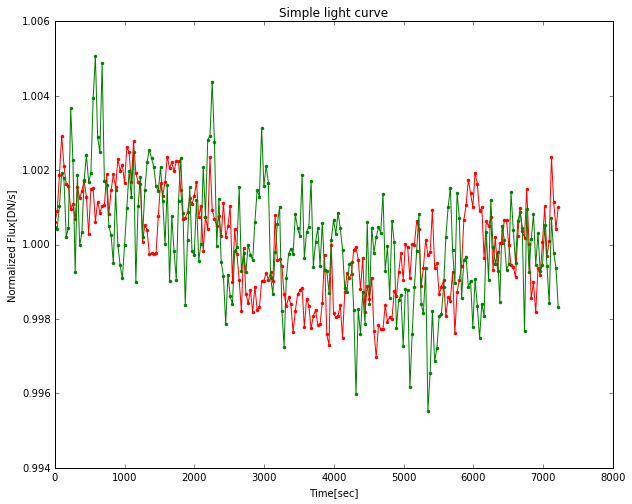

In [31]:
rl.light_curve(mmm_data4['Time'], mmm_data4['a1_b4_res_flux'], style = 'r.-', lbl = "FULL4 MMM")
rl.light_curve(mmp_data4['Time'], mmp_data4['a1_b4_res_flux'], style = 'g.-', lbl = "FULL4 MMP")

In [32]:
detrended_mmm4 = rl.linear_bestfit(mmm_data4['Time'], mmm_data4['a1_b4_res_flux'], 0.002, 0.9)
detrended_mmp4 = rl.linear_bestfit(mmp_data4['Time'], mmp_data4['a1_b4_res_flux'], 0.002, 0.9)
std_m4 = np.std(detrended_mmm4)*1e6
std_p4 = np.std(detrended_mmp4)*1e6

#### FULL5

In [33]:
a15_files = []
for each in dtype:
    a15_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL5-*_481_SE_*/*.red.fits')))
print len(a15_files), len(a15_files[0]), len(a15_files[1])

2 110 110


In [34]:
b45_files = []
for each in dtype:
    b45_files.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_'+each+
                              '/NRCN821WLP8FULL5-*_489_SE_*/*.red.fits')))
print len(b45_files), len(b45_files[0]), len(b45_files[1])

2 110 110


In [35]:
a15_centers = []
for i, ds in enumerate(a15_files):
    if i == 0:
        a15_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True)[0])
    else:
        a15_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits')[0])
print len(a15_centers), len(a15_centers[0])

2 110


In [36]:
b45_centers = []
for i, ds in enumerate(b45_files):
    if i == 0:
        b45_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True)[0])
    else:
        b45_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True, flat_name = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits')[0])
print len(b45_centers), len(b45_centers[0])

2 110


In [37]:
mmm_data5 = rl.average_residual_flux(a15_centers[0], b45_centers[0], 70, 72, 80, 
                                     a15_files[0], b45_files[0], red = True)
mmp_data5 = rl.average_residual_flux(a15_centers[1], b45_centers[1], 70, 72, 80, 
                                     a15_files[1], b45_files[1], red = True, flat_name_a1 = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCA1_17004_PFlat_F150W_CLEAR_2016-04-05.fits', flat_name_b4 = '/usr/local/nircamsuite/cal/Flat/ISIMCV3/NRCB4_17047_PFlat_F150W_CLEAR_2016-04-05.fits')

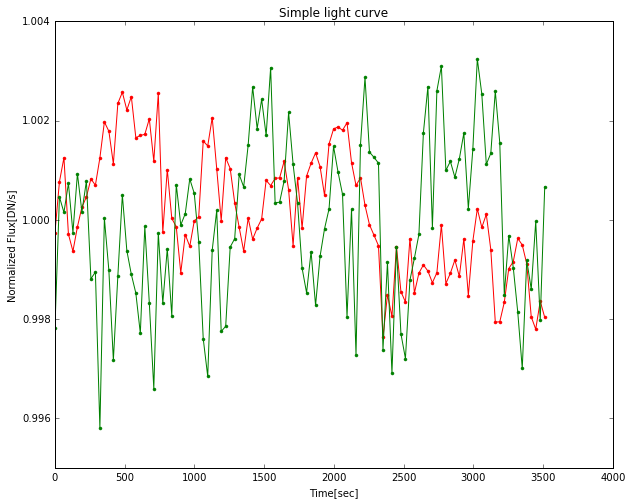

In [38]:
rl.light_curve(mmm_data5['Time'], mmm_data5['a1_b4_res_flux'], style = 'r.-', lbl = "FULL5 MMM")
rl.light_curve(mmp_data5['Time'], mmp_data5['a1_b4_res_flux'], style = 'g.-', lbl = "FULL5 MMP")

In [39]:
detrended_mmm5 = rl.linear_bestfit(mmm_data5['Time'], mmm_data5['a1_b4_res_flux'], 0.002, 0.9)
detrended_mmp5 = rl.linear_bestfit(mmp_data5['Time'], mmp_data5['a1_b4_res_flux'], 0.002, 0.9)
std_m5 = np.std(detrended_mmm5)*1e6
std_p5 = np.std(detrended_mmp5)*1e6

## Result

In [40]:
result_table = Table(names = ('Test Number (FULL #)', 'MMM', 'MMP'))
for x in range(1,6):
    std_m = globals()['std_m%s' % x]
    std_p = globals()['std_p%s' % x]
    result_table.add_row([x, std_m, std_p])
result_table

Test Number (FULL #),MMM,MMP
float64,float64,float64
1.0,1487.19748855,2292.21541602
2.0,1680.7523039,1858.52135416
3.0,1022.47293601,1931.60658963
4.0,1233.00431114,1346.95902981
5.0,949.739672532,1590.70803062
